In [1]:
from collections import Counter
from math import sqrt
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as sps
import matplotlib.pyplot as plt

In [52]:
def flip_coin(num, eps):
    uni = sps.uniform(0.5, 1)
    sample = uni.rvs(num)
    sample = np.floor(sample)
    counts = Counter(sample)
    rel_freq = counts[1] / num
    print("Для {:d} гербов".format(num))
    print("Количество выпадения гербов: {:d}".format(counts[1]))
    print("Относительная частота выпадения герба: {:f}".format(rel_freq))
    print("|{:f} - 0.5| = {:f} < {:.2f}".format(rel_freq, abs(rel_freq - 0.5), eps))

In [56]:
flip_coin(170, 0.1)
print()
flip_coin(1850, 0.03)

Для 170 гербов
Количество выпадения гербов: 91
Относительная частота выпадения герба: 0.535294
|0.535294 - 0.5| = 0.035294 < 0.10

Для 1850 гербов
Количество выпадения гербов: 933
Относительная частота выпадения герба: 0.504324
|0.504324 - 0.5| = 0.004324 < 0.03


In [116]:
def law_large_numbers(eps):
    expon = sps.expon(0, 1)
    n = int(np.ceil(5.4*1 / (eps*eps)))
    sample = expon.rvs(n)
    m = np.mean(sample)
    print("Для {:d} вариантов:".format(n))
    print("|{:f} - 1| = {:f} < {:.2f}".format(m, abs(m - 1), eps))
    

In [117]:
law_large_numbers(0.2)
print()
law_large_numbers(0.05)

Для 135 вариантов:
|1.050930 - 1| = 0.050930 < 0.20

Для 2160 вариантов:
|0.989373 - 1| = 0.010627 < 0.05


In [118]:
def not_law_large_numbers():    
    cauchy = sps.cauchy()
    sample_size = 1000
    num = 7
    samples = []
    means = np.array([])
    for i in range(num):
        samples.append(cauchy.rvs(sample_size))
        means = np.append(means, np.mean(samples[i]))
    print("Модули средних значений 7 выборок по 1000 элементов:")
    print(abs(means))
    print("Модуль общего среднего из 7 выборок по 1000 элементов: {:f}".format(np.mean(abs(means))))
    
    num = 1000
    sample = cauchy.rvs(num)
    X = np.linspace(0, num, num)
    plt.plot(X, sample)
    plt.xlabel("Номер испытания")
    plt.ylabel("Значение случайной величины")

Модули средних значений 7 выборок по 1000 элементов:
[0.577584   3.44103815 0.38958673 0.83514117 1.31457382 2.92330661
 3.85649793]
Модуль общего среднего из 7 выборок по 1000 элементов: 1.905390


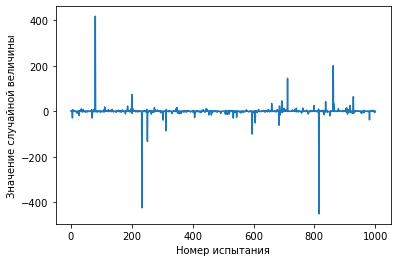

In [122]:
not_law_large_numbers()

In [128]:
def deviation(sample_size):
    uni = sps.uniform(0, 1)
    num = 20
    samples = []
    means = np.zeros(num)
    for i in range(num):
        samples.append(uni.rvs(sample_size))
        means[i] = np.mean(samples[i])
    print("Средние значения из {:d} выборок по {:d}:".format(num, sample_size))
    print(means)
    std_dev = sps.tstd(means)
    print("Среднеквадратичное отклонение от выборочного среднего: {:f}".format(std_dev))
    print("Минимальное среднее: {:f}".format(min(means)))
    print("Максимальное среднее: {:f}".format(max(means)))
    print()
    Y = np.full((num),  sample_size)
    plt.plot(means, Y, 'o')

Средние значения из 20 выборок по 10:
[0.4455527  0.501951   0.48100524 0.57043195 0.4261721  0.46925754
 0.48872221 0.4521644  0.54969394 0.59034571 0.4850845  0.73923728
 0.58942868 0.39481989 0.35074142 0.51214994 0.42174011 0.57181193
 0.60445369 0.60531979]
Среднеквадратичное отклонение от выборочного среднего: 0.090854
Минимальное среднее: 0.350741
Максимальное среднее: 0.739237

Средние значения из 20 выборок по 40:
[0.44031595 0.34146192 0.44721489 0.52240023 0.46908151 0.4183448
 0.51884795 0.48525784 0.57593888 0.53851452 0.49391462 0.55602899
 0.50253459 0.43412806 0.45600227 0.45903735 0.51568897 0.57116097
 0.51911583 0.56661239]
Среднеквадратичное отклонение от выборочного среднего: 0.059498
Минимальное среднее: 0.341462
Максимальное среднее: 0.575939

Средние значения из 20 выборок по 160:
[0.51484383 0.49399461 0.49646251 0.55044692 0.48765453 0.49883937
 0.53695916 0.44948514 0.4793161  0.49802136 0.51052429 0.49463578
 0.51012412 0.49256859 0.5434319  0.49586366 0.546

Text(0, 0.5, 'Количество элементов в выборке')

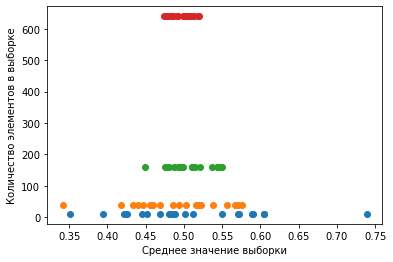

In [129]:
deviation(10)
deviation(40)
deviation(160)
deviation(640)
plt.xlabel("Среднее значение выборки")
plt.ylabel("Количество элементов в выборке")


In [131]:
def borel():
    sample_size = 500
    vars = [0, 1]
    sample = np.random.choice(vars, sample_size)
    freq = np.zeros((sample_size))
    freq[0] = sample[0]
    for i in range(1, sample_size):
        freq[i] = (i * freq[i-1] + sample[i]) / float(i+1)
    X = np.linspace(0, sample_size, sample_size)
    plt.plot(X, freq)

Text(0, 0.5, 'Средняя вероятность выпадения герба')

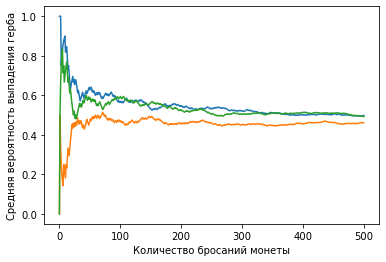

In [132]:
borel()
borel()
borel()
plt.xlabel("Количество бросаний монеты")
plt.ylabel("Средняя вероятность выпадения герба")

In [136]:
def not_borel(param):
    sample_size = 500
    vars = [-1, 1]
    signs = np.random.choice(vars, sample_size)
    uni = sps.uniform(0, 1)
    uniformed = uni.rvs(sample_size)
    sample = []
    for i in range(sample_size):
        sample.append((uniformed[i] ** (-param) - 1) * signs[i])
    
    freq = np.zeros((sample_size))
    freq[0] = sample[0]
    for i in range(1, sample_size):
        freq[i] = (i * freq[i-1] + sample[i]) / float(i+1)
    X = np.linspace(0, sample_size, sample_size)
    plt.plot(X, freq)

def not_borel_3_times(param):
    for i in range(3):
        not_borel(param)
    plt.xlabel("Количество испытаний")
    plt.ylabel("Среднее значение случайной величины")

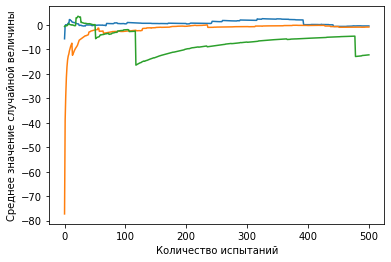

In [137]:
not_borel_3_times(1)

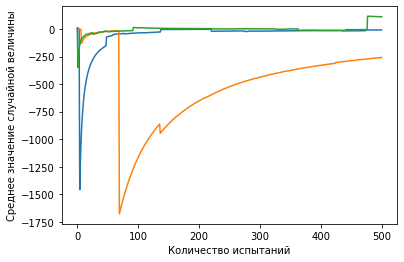

In [138]:
not_borel_3_times(1.5)

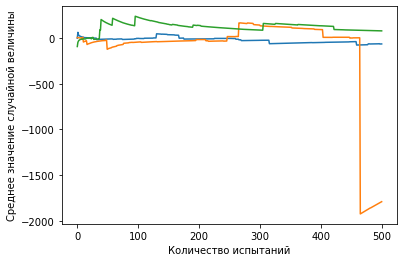

In [139]:
not_borel_3_times(2)

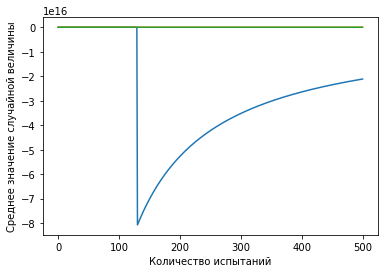

In [140]:
not_borel_3_times(5)

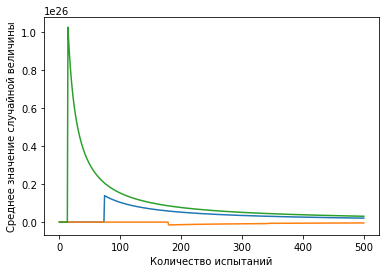

In [141]:
not_borel_3_times(10)

In [144]:
def glivenko(sample_size):
    uni = sps.uniform(0, 1)
    sample = uni.rvs(sample_size)
    sample = sorted(sample)
    cdf = [1.0 / sample_size]
    for i in range(1, sample_size):
        cdf.append(cdf[i-1] + 1.0 / sample_size)
    X = np.linspace(0, 1, 100)
    theor_cdf = uni.cdf(X)
    
    plt.step(sample, cdf)
    plt.plot(X, theor_cdf)
    plt.xlabel("x")
    plt.ylabel("F(x)")

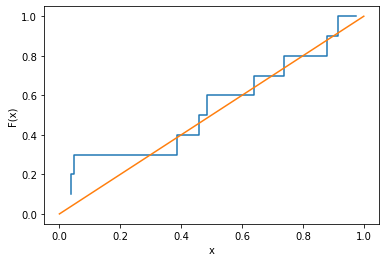

In [148]:
glivenko(10)

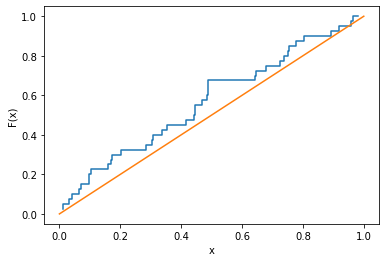

In [149]:
glivenko(40)

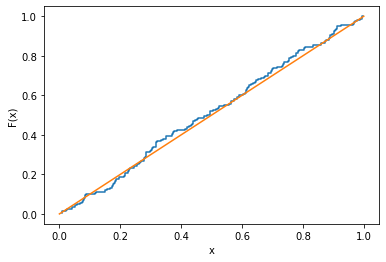

In [150]:
glivenko(160)

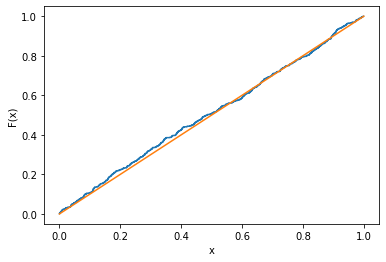

In [151]:
glivenko(640)

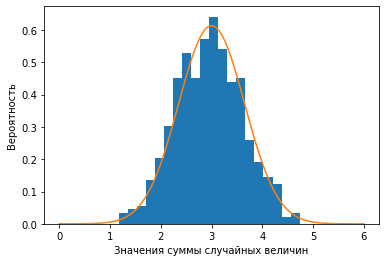

In [201]:

def clt(sample_size, create_random_variable, theor_pdf, interval):
    sample = []
    for i in range(sample_size):
        sample.append(create_random_variable())
    X = np.linspace(interval[0], interval[1], 100)
    Y = []
    for i in range(len(X)):
        Y.append(theor_pdf(X[i]))
    plt.hist(sample, bins=20, density=True)
    plt.plot(X, Y)
    plt.xlabel("Значения суммы случайных величин")
    plt.ylabel("Вероятность")


def create_mixed_variable():
    value = sps.beta.rvs(1, 0.5, size=1)[0]
    value += sps.beta.rvs(0.5, 1, size=1)[0]
    value += sps.beta.rvs(1, 1, size=1)[0]
    value += sps.beta.rvs(1, 2, size=1)[0]
    value += sps.beta.rvs(2, 1, size=1)[0]
    value += sps.beta.rvs(2, 2, size=1)[0]
    return value


def beta_expected_value(a, b):
    return a / (a + b)


def beta_dispersion(a, b):
    return a * b / ((a + b) * (a + b) * (a + b + 1))


expected_value = beta_expected_value(1, 0.5) + \
    beta_expected_value(0.5, 1) + beta_expected_value(1, 1) + \
    beta_expected_value(1, 2) + beta_expected_value(2, 1) + \
    beta_expected_value(2, 2)
dispersion = beta_dispersion(1, 0.5) + \
    beta_dispersion(0.5, 1) + beta_dispersion(1, 1) + \
    beta_dispersion(1, 2) + beta_dispersion(2, 1) + \
    beta_dispersion(2, 2)

def theor_pdf(x):
    return sps.norm.pdf(x, loc=expected_value, scale=sqrt(dispersion))

        
clt(500, create_mixed_variable, theor_pdf, (0, 6))

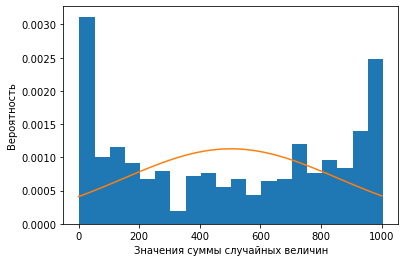

In [245]:
def create_bad_mixed_variable():
    return create_mixed_variable() + 1000 * sps.beta.rvs(0.5, 0.5, size=1)[0]


bad_expected_value = expected_value + 1000 * beta_expected_value(0.5, 0.5)
bad_dispersion = dispersion + 1000000 * beta_dispersion(0.5, 0.5)

def bad_theor_pdf(x):
    return sps.norm.pdf(x, loc=bad_expected_value, scale=sqrt(bad_dispersion))


clt(500, create_bad_mixed_variable, bad_theor_pdf, (0, 1000))